Read the training data as a pandas dataframe.

In [1]:
import pandas as pd

train_file = 'task1_trainset.csv'
df = pd.read_csv(train_file) 

* create another feature that tag every sentence with the label

In [2]:
df['tag_sent'] = df[['Abstract','Task 1']].apply(lambda x: list(zip(x['Abstract'].split('$$$'), x['Task 1'].split(' '))), axis=1)
df[::1000]

,Id,Title,Abstract,Authors,Categories,Created Date,Task 1,tag_sent
0,D00001,A Brain-Inspired Trust Management Model to Ass...,Rapid popularity of Internet of Things (IoT) a...,Mahmud/Kaiser/Rahman/Rahman/Shabut/Al-Mamun/Hu...,cs.CR/cs.AI/q-bio.NC,2018-01-11,BACKGROUND OBJECTIVES METHODS METHODS RESULTS ...,[(Rapid popularity of Internet of Things (IoT)...
1000,D01001,Proprties of biclustering algorithms and a nov...,Biclustering is found to be useful in areas li...,Jain/Ghosh/Ghosh/Murthy,cs.CV/cs.LG,2018-11-12,BACKGROUND OBJECTIVES OBJECTIVES OBJECTIVES ME...,[(Biclustering is found to be useful in areas ...
2000,D02001,Scalable Object Detection using Deep Neural Ne...,Deep convolutional neural networks have recent...,Erhan/Szegedy/Toshev/Anguelov,cs.CV/stat.ML,2013-12-08,BACKGROUND BACKGROUND BACKGROUND OBJECTIVES/ME...,[(Deep convolutional neural networks have rece...
3000,D03001,Multipath Stealth Communication with Jammers,We consider the problem of stealth communicati...,Song/Qiaosheng/Zhang/Kadhe/Bakshi/Jaggi,cs.IT/math.IT,2018-05-08,OBJECTIVES OBJECTIVES METHODS METHODS RESULTS,[(We consider the problem of stealth communica...
4000,D04001,I Spy with My Little Eye: Analysis and Detecti...,Several studies have been conducted on underst...,Aggarwal/Viswanath/Kumar/Shah/Zhang/Kumaraguru,cs.CR,2016-12-02,BACKGROUND BACKGROUND METHODS OBJECTIVES METHO...,[(Several studies have been conducted on under...
5000,D05001,A Machine Learning Approach to Persian Text Re...,An automated approach to text readability asse...,Mohammadi/Khasteh,cs.CL,2018-10-07,OBJECTIVES OBJECTIVES OBJECTIVES RESULTS RESUL...,[(An automated approach to text readability as...
6000,D06001,Cardinal-Recognizing Infinite Time Turing Mach...,We introduce a model of infinitary computation...,Habič,math.LO/cs.FL/cs.LO,2013-10-21,OBJECTIVES/METHODS RESULTS/CONCLUSIONS,[(We introduce a model of infinitary computati...


* dictionary

In [7]:
print(len(df['tag_sent'].values))
print(len(df['Categories'].values))

7000
7000


In [8]:
# (sentence, position_in_abstract, categories)
sent_tag = [(s, idx, df['Categories'].values[index]) 
            for index, sent in enumerate(df['tag_sent'].values) 
            for idx, s in enumerate(sent)]
sent_tag[0]

(('Rapid popularity of Internet of Things (IoT) and cloud computing permits neuroscientists to collect multilevel and multichannel brain data to better understand brain functions, diagnose diseases, and devise treatments.',
  'BACKGROUND'),
 0,
 'cs.CR/cs.AI/q-bio.NC')

In [9]:
sent_tag_dic = dict()

# label: (position, sentence, categories)
for ((sent,labels), idx, cate) in sent_tag:
    label_list = labels.split('/')
    for label in label_list:
        if label not in sent_tag_dic:
            sent_tag_dic.update({label:[(idx, sent, cate)]})
        else:
            sent_tag_dic[label].append((idx, sent, cate))



In [11]:
sent_tag_dic.keys()

dict_keys(['BACKGROUND', 'OBJECTIVES', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'OTHERS'])

In [12]:
print('BACKGROUND', len(sent_tag_dic['BACKGROUND']))
print('CONCLUSIONS', len(sent_tag_dic['CONCLUSIONS']))
print('METHODS', len(sent_tag_dic['METHODS']))
print('OBJECTIVES', len(sent_tag_dic['OBJECTIVES']))
print('OTHERS', len(sent_tag_dic['OTHERS']))
print('RESULTS', len(sent_tag_dic['RESULTS']))

BACKGROUND 13353
CONCLUSIONS 5313
METHODS 13655
OBJECTIVES 9329
OTHERS 901
RESULTS 11772


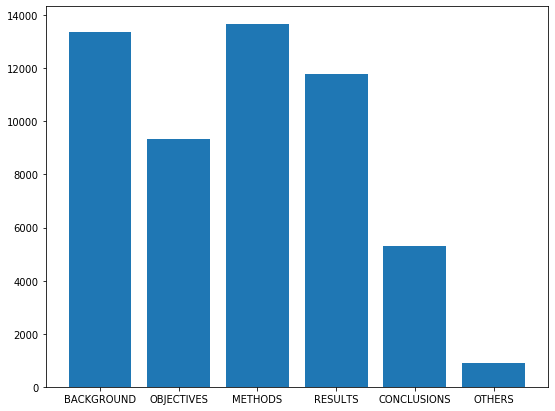

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize=(9, 7))
x = sent_tag_dic.keys()
y = [len(sent_tag_dic[k]) for k in sent_tag_dic.keys()]
plt.bar(x, y)
plt.show()

* new dataframe

In [19]:
df_words = pd.DataFrame([(k, v[0], v[1], v[2]) for k,vlst in sent_tag_dic.items() for v in vlst ],
                        columns=['label', 'position', 'sentence', 'categories'])
df_words[::10000]

,label,position,sentence,categories
0,BACKGROUND,0,Rapid popularity of Internet of Things (IoT) a...,cs.CR/cs.AI/q-bio.NC
10000,BACKGROUND,5,"Thus, no positioning service can be obtained i...",cs.NI
20000,OBJECTIVES,1,The proposed framework is aiming to address tw...,cs.CV
30000,METHODS,6,Components of the NiftyNet pipeline including ...,cs.CV/cs.LG/cs.NE
40000,RESULTS,0,"In this paper, we provide upper and lower boun...",math.PR/cs.IT/math.IT/math.OC
50000,CONCLUSIONS,5,These methods allow arbitrary approximations o...,math.OC/cs.NA


In [20]:
df_words['sent_len'] = df_words['sentence'].apply(lambda x: len(x.split(' ')))

In [22]:
df_words[::5000]

,label,position,sentence,categories,sent_len
0,BACKGROUND,0,Rapid popularity of Internet of Things (IoT) a...,cs.CR/cs.AI/q-bio.NC,29
5000,BACKGROUND,4,Previous methods typically match the whole sou...,cs.CV,32
10000,BACKGROUND,5,"Thus, no positioning service can be obtained i...",cs.NI,10
15000,OBJECTIVES,0,The ultimate goal of any software developer se...,cs.SE,18
20000,OBJECTIVES,1,The proposed framework is aiming to address tw...,cs.CV,15
25000,METHODS,4,Logical and behavioral equivalence of game mod...,cs.LO,9
30000,METHODS,6,Components of the NiftyNet pipeline including ...,cs.CV/cs.LG/cs.NE,33
35000,METHODS,4,The deferred write approach is followed to imp...,cs.DC,10
40000,RESULTS,0,"In this paper, we provide upper and lower boun...",math.PR/cs.IT/math.IT/math.OC,22
45000,RESULTS,3,We show that the information distance is a uni...,cs.IT/math.IT/math.PR/physics.data-an,12


---

---

In [25]:
means = [
    np.mean(df_words.groupby('label').get_group('METHODS').sent_len.values),
    np.mean(df_words.groupby('label').get_group('BACKGROUND').sent_len.values),
    np.mean(df_words.groupby('label').get_group('RESULTS').sent_len.values),
    np.mean(df_words.groupby('label').get_group('OBJECTIVES').sent_len.values),
    np.mean(df_words.groupby('label').get_group('CONCLUSIONS').sent_len.values),
    np.mean(df_words.groupby('label').get_group('OTHERS').sent_len.values)
]
median = [
    np.median(df_words.groupby('label').get_group('METHODS').sent_len.values),
    np.median(df_words.groupby('label').get_group('BACKGROUND').sent_len.values),
    np.median(df_words.groupby('label').get_group('RESULTS').sent_len.values),
    np.median(df_words.groupby('label').get_group('OBJECTIVES').sent_len.values),
    np.median(df_words.groupby('label').get_group('CONCLUSIONS').sent_len.values),
    np.median(df_words.groupby('label').get_group('OTHERS').sent_len.values)
]
index = ['METHODS', 'BACKGROUND', 'RESULTS', 'OBJECTIVES', 'CONCLUSIONS', 'OTHERS']

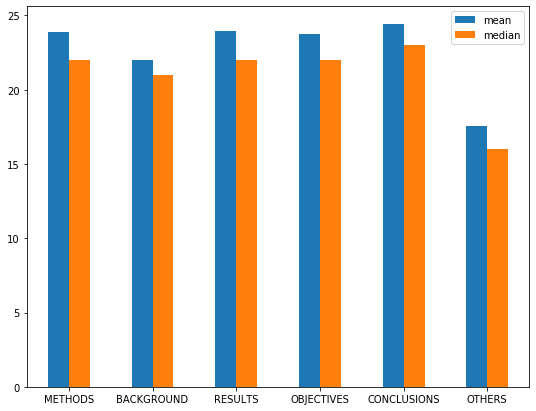

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline


mixed_X = pd.DataFrame({'mean':means, 
                        'median':median}, 
                        index=index)
mixed_X.plot.bar(rot=0, figsize=(9,7))

In [27]:
df_words.label.value_counts()

METHODS        13655
BACKGROUND     13353
RESULTS        11772
OBJECTIVES      9329
CONCLUSIONS     5313
OTHERS           901
Name: label, dtype: int64

In [28]:
df_words.values[133]

array(['BACKGROUND', 0,
       'An adversarial example is an example that has been adjusted to produce the wrong label when presented to a system at test time.',
       'cs.CV/cs.AI/cs.GR', 23], dtype=object)

In [29]:
df_words.groupby('label').size()

label
BACKGROUND     13353
CONCLUSIONS     5313
METHODS        13655
OBJECTIVES      9329
OTHERS           901
RESULTS        11772
dtype: int64